# Dropout for Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout ###************
from tensorflow.keras.callbacks import EarlyStopping ########**************
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_circles

In [2]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [3]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

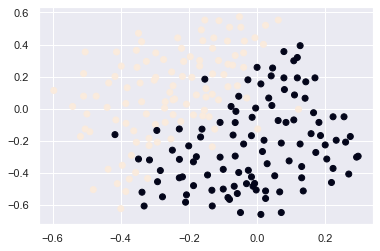

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Build a basic Sequential Model without Dropout

In [5]:
model = Sequential()
model.add(Dense(128, input_dim=2, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X, y, epochs = 500, validation_split=0.2, verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 32ms/step - loss: 0.6819 - accuracy: 0.7024 - val_loss: 0.6762 - val_accuracy: 0.5581
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6384 - accuracy: 0.8690 - val_loss: 0.6612 - val_accuracy: 0.5814
Epoch 3/500
6/6 [==============================] - 0s 6ms/step - loss: 0.5952 - accuracy: 0.8571 - val_loss: 0.6452 - val_accuracy: 0.5814
Epoch 4/500
6/6 [==============================] - 0s 6ms/step - loss: 0.5441 - accuracy: 0.8690 - val_loss: 0.6297 - val_accuracy: 0.6047
Epoch 5/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4869 - accuracy: 0.8750 - val_loss: 0.6135 - val_accuracy: 0.6047
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4292 - accuracy: 0.8810 - val_loss: 0.6048 - val_accuracy: 0.6047
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 0.3723 - accuracy: 0.8810 - val_loss: 0.6004 - val_accuracy: 0.6047
Epoch 8/500
6/6 [=========

6/6 [==============================] - 0s 5ms/step - loss: 0.1939 - accuracy: 0.9286 - val_loss: 0.3891 - val_accuracy: 0.8605
Epoch 60/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1933 - accuracy: 0.9345 - val_loss: 0.3887 - val_accuracy: 0.8605
Epoch 61/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1927 - accuracy: 0.9286 - val_loss: 0.3881 - val_accuracy: 0.8605
Epoch 62/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1925 - accuracy: 0.9345 - val_loss: 0.3950 - val_accuracy: 0.8605
Epoch 63/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1923 - accuracy: 0.9286 - val_loss: 0.3979 - val_accuracy: 0.8605
Epoch 64/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1921 - accuracy: 0.9286 - val_loss: 0.3975 - val_accuracy: 0.8605
Epoch 65/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1924 - accuracy: 0.9226 - val_loss: 0.4104 - val_accuracy: 0.8605
Epoch 66/500
6/6 [===============

6/6 [==============================] - 0s 6ms/step - loss: 0.1812 - accuracy: 0.9405 - val_loss: 0.4138 - val_accuracy: 0.8605
Epoch 118/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1806 - accuracy: 0.9405 - val_loss: 0.4022 - val_accuracy: 0.8605
Epoch 119/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1811 - accuracy: 0.9405 - val_loss: 0.3939 - val_accuracy: 0.8605
Epoch 120/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1844 - accuracy: 0.9405 - val_loss: 0.3953 - val_accuracy: 0.8605
Epoch 121/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1809 - accuracy: 0.9405 - val_loss: 0.4070 - val_accuracy: 0.8605
Epoch 122/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1777 - accuracy: 0.9345 - val_loss: 0.4228 - val_accuracy: 0.8605
Epoch 123/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1785 - accuracy: 0.9345 - val_loss: 0.4240 - val_accuracy: 0.8605
Epoch 124/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1671 - accuracy: 0.9464 - val_loss: 0.4404 - val_accuracy: 0.8372
Epoch 176/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1693 - accuracy: 0.9405 - val_loss: 0.4453 - val_accuracy: 0.8372
Epoch 177/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1674 - accuracy: 0.9405 - val_loss: 0.4415 - val_accuracy: 0.8372
Epoch 178/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1675 - accuracy: 0.9286 - val_loss: 0.4334 - val_accuracy: 0.8605
Epoch 179/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1657 - accuracy: 0.9345 - val_loss: 0.4384 - val_accuracy: 0.8372
Epoch 180/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1644 - accuracy: 0.9345 - val_loss: 0.4290 - val_accuracy: 0.8372
Epoch 181/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1643 - accuracy: 0.9524 - val_loss: 0.4083 - val_accuracy: 0.8605
Epoch 182/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1538 - accuracy: 0.9583 - val_loss: 0.3915 - val_accuracy: 0.8372
Epoch 234/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1546 - accuracy: 0.9524 - val_loss: 0.3811 - val_accuracy: 0.8837
Epoch 235/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1535 - accuracy: 0.9524 - val_loss: 0.3988 - val_accuracy: 0.8372
Epoch 236/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1539 - accuracy: 0.9583 - val_loss: 0.4167 - val_accuracy: 0.8372
Epoch 237/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1517 - accuracy: 0.9583 - val_loss: 0.4356 - val_accuracy: 0.8372
Epoch 238/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1517 - accuracy: 0.9583 - val_loss: 0.4549 - val_accuracy: 0.8372
Epoch 239/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1546 - accuracy: 0.9405 - val_loss: 0.4595 - val_accuracy: 0.8372
Epoch 240/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1380 - accuracy: 0.9583 - val_loss: 0.4392 - val_accuracy: 0.8372
Epoch 292/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1406 - accuracy: 0.9583 - val_loss: 0.4422 - val_accuracy: 0.8372
Epoch 293/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1392 - accuracy: 0.9583 - val_loss: 0.4261 - val_accuracy: 0.8372
Epoch 294/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1391 - accuracy: 0.9583 - val_loss: 0.4261 - val_accuracy: 0.8605
Epoch 295/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1389 - accuracy: 0.9583 - val_loss: 0.4224 - val_accuracy: 0.8605
Epoch 296/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1387 - accuracy: 0.9583 - val_loss: 0.4209 - val_accuracy: 0.8605
Epoch 297/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1369 - accuracy: 0.9583 - val_loss: 0.4463 - val_accuracy: 0.8372
Epoch 298/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1289 - accuracy: 0.9583 - val_loss: 0.4520 - val_accuracy: 0.8372
Epoch 350/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1275 - accuracy: 0.9583 - val_loss: 0.4409 - val_accuracy: 0.8605
Epoch 351/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1272 - accuracy: 0.9583 - val_loss: 0.4428 - val_accuracy: 0.8605
Epoch 352/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1265 - accuracy: 0.9583 - val_loss: 0.4483 - val_accuracy: 0.8372
Epoch 353/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1285 - accuracy: 0.9524 - val_loss: 0.4545 - val_accuracy: 0.8372
Epoch 354/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1285 - accuracy: 0.9524 - val_loss: 0.4492 - val_accuracy: 0.8372
Epoch 355/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1263 - accuracy: 0.9583 - val_loss: 0.4368 - val_accuracy: 0.8605
Epoch 356/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1175 - accuracy: 0.9583 - val_loss: 0.4597 - val_accuracy: 0.8605
Epoch 408/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1196 - accuracy: 0.9583 - val_loss: 0.4811 - val_accuracy: 0.8605
Epoch 409/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1151 - accuracy: 0.9643 - val_loss: 0.4838 - val_accuracy: 0.8605
Epoch 410/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1159 - accuracy: 0.9583 - val_loss: 0.4912 - val_accuracy: 0.8605
Epoch 411/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1154 - accuracy: 0.9583 - val_loss: 0.4902 - val_accuracy: 0.8605
Epoch 412/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1141 - accuracy: 0.9583 - val_loss: 0.4942 - val_accuracy: 0.8605
Epoch 413/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1173 - accuracy: 0.9583 - val_loss: 0.4830 - val_accuracy: 0.8605
Epoch 414/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1054 - accuracy: 0.9583 - val_loss: 0.5262 - val_accuracy: 0.8605
Epoch 466/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1045 - accuracy: 0.9583 - val_loss: 0.5208 - val_accuracy: 0.8605
Epoch 467/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1039 - accuracy: 0.9583 - val_loss: 0.5328 - val_accuracy: 0.8605
Epoch 468/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1046 - accuracy: 0.9583 - val_loss: 0.5379 - val_accuracy: 0.8605
Epoch 469/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1043 - accuracy: 0.9583 - val_loss: 0.5300 - val_accuracy: 0.8605
Epoch 470/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1056 - accuracy: 0.9583 - val_loss: 0.5609 - val_accuracy: 0.8372
Epoch 471/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1060 - accuracy: 0.9583 - val_loss: 0.5558 - val_accuracy: 0.8372
Epoch 472/500
6/6 [========

In [6]:
history = model.fit(X, y, epochs = 500, validation_split=0.2, verbose=1)

Epoch 1/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1027 - accuracy: 0.9583 - val_loss: 0.5892 - val_accuracy: 0.8372
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0988 - accuracy: 0.9524 - val_loss: 0.6024 - val_accuracy: 0.8372
Epoch 3/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1001 - accuracy: 0.9583 - val_loss: 0.6002 - val_accuracy: 0.8372
Epoch 4/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1009 - accuracy: 0.9524 - val_loss: 0.5869 - val_accuracy: 0.8605
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1008 - accuracy: 0.9583 - val_loss: 0.5653 - val_accuracy: 0.8605
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0983 - accuracy: 0.9643 - val_loss: 0.5840 - val_accuracy: 0.8372
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0984 - accuracy: 0.9524 - val_loss: 0.5997 - val_accuracy: 0.8372
Epoch 8/500
6/6 [=========

6/6 [==============================] - 0s 6ms/step - loss: 0.0911 - accuracy: 0.9583 - val_loss: 0.6093 - val_accuracy: 0.8605
Epoch 60/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0908 - accuracy: 0.9583 - val_loss: 0.6398 - val_accuracy: 0.8372
Epoch 61/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0908 - accuracy: 0.9583 - val_loss: 0.6121 - val_accuracy: 0.8605
Epoch 62/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0918 - accuracy: 0.9583 - val_loss: 0.6130 - val_accuracy: 0.8605
Epoch 63/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0902 - accuracy: 0.9583 - val_loss: 0.6375 - val_accuracy: 0.8372
Epoch 64/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0900 - accuracy: 0.9583 - val_loss: 0.6429 - val_accuracy: 0.8372
Epoch 65/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0903 - accuracy: 0.9583 - val_loss: 0.6450 - val_accuracy: 0.8372
Epoch 66/500
6/6 [===============

6/6 [==============================] - 0s 6ms/step - loss: 0.0855 - accuracy: 0.9643 - val_loss: 0.6693 - val_accuracy: 0.8605
Epoch 118/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0843 - accuracy: 0.9702 - val_loss: 0.6724 - val_accuracy: 0.8605
Epoch 119/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0853 - accuracy: 0.9643 - val_loss: 0.6934 - val_accuracy: 0.8605
Epoch 120/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0859 - accuracy: 0.9702 - val_loss: 0.6932 - val_accuracy: 0.8605
Epoch 121/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0842 - accuracy: 0.9643 - val_loss: 0.7032 - val_accuracy: 0.8605
Epoch 122/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0837 - accuracy: 0.9643 - val_loss: 0.7171 - val_accuracy: 0.8372
Epoch 123/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0860 - accuracy: 0.9583 - val_loss: 0.6904 - val_accuracy: 0.8605
Epoch 124/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.0799 - accuracy: 0.9702 - val_loss: 0.7598 - val_accuracy: 0.8605
Epoch 176/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0804 - accuracy: 0.9762 - val_loss: 0.7069 - val_accuracy: 0.8605
Epoch 177/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0832 - accuracy: 0.9643 - val_loss: 0.7338 - val_accuracy: 0.8605
Epoch 178/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0793 - accuracy: 0.9702 - val_loss: 0.7277 - val_accuracy: 0.8605
Epoch 179/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0771 - accuracy: 0.9762 - val_loss: 0.7068 - val_accuracy: 0.8605
Epoch 180/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0777 - accuracy: 0.9702 - val_loss: 0.7201 - val_accuracy: 0.8605
Epoch 181/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0772 - accuracy: 0.9643 - val_loss: 0.7483 - val_accuracy: 0.8605
Epoch 182/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.0724 - accuracy: 0.9643 - val_loss: 0.8167 - val_accuracy: 0.8605
Epoch 234/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0730 - accuracy: 0.9643 - val_loss: 0.8278 - val_accuracy: 0.8605
Epoch 235/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0745 - accuracy: 0.9643 - val_loss: 0.8336 - val_accuracy: 0.8372
Epoch 236/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0710 - accuracy: 0.9643 - val_loss: 0.8291 - val_accuracy: 0.8605
Epoch 237/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0711 - accuracy: 0.9702 - val_loss: 0.8081 - val_accuracy: 0.8605
Epoch 238/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0731 - accuracy: 0.9702 - val_loss: 0.8312 - val_accuracy: 0.8372
Epoch 239/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0715 - accuracy: 0.9762 - val_loss: 0.8874 - val_accuracy: 0.8140
Epoch 240/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.0670 - accuracy: 0.9762 - val_loss: 0.9142 - val_accuracy: 0.8140
Epoch 292/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0657 - accuracy: 0.9762 - val_loss: 0.9023 - val_accuracy: 0.8372
Epoch 293/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0678 - accuracy: 0.9762 - val_loss: 0.9315 - val_accuracy: 0.8140
Epoch 294/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0651 - accuracy: 0.9762 - val_loss: 0.9617 - val_accuracy: 0.7907
Epoch 295/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0731 - accuracy: 0.9762 - val_loss: 0.9250 - val_accuracy: 0.8140
Epoch 296/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0695 - accuracy: 0.9762 - val_loss: 0.8906 - val_accuracy: 0.8372
Epoch 297/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0694 - accuracy: 0.9762 - val_loss: 0.9075 - val_accuracy: 0.8372
Epoch 298/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.0615 - accuracy: 0.9762 - val_loss: 0.9863 - val_accuracy: 0.8140
Epoch 350/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0617 - accuracy: 0.9821 - val_loss: 1.0476 - val_accuracy: 0.8140
Epoch 351/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0631 - accuracy: 0.9821 - val_loss: 0.9840 - val_accuracy: 0.8372
Epoch 352/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0625 - accuracy: 0.9702 - val_loss: 0.9411 - val_accuracy: 0.8372
Epoch 353/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0623 - accuracy: 0.9762 - val_loss: 0.9532 - val_accuracy: 0.8372
Epoch 354/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0611 - accuracy: 0.9821 - val_loss: 1.0071 - val_accuracy: 0.8140
Epoch 355/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0630 - accuracy: 0.9762 - val_loss: 1.0452 - val_accuracy: 0.8140
Epoch 356/500
6/6 [========

6/6 [==============================] - 0s 5ms/step - loss: 0.0632 - accuracy: 0.9821 - val_loss: 1.0787 - val_accuracy: 0.8140
Epoch 408/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0601 - accuracy: 0.9821 - val_loss: 1.0163 - val_accuracy: 0.8140
Epoch 409/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0673 - accuracy: 0.9643 - val_loss: 1.1764 - val_accuracy: 0.8140
Epoch 410/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0655 - accuracy: 0.9881 - val_loss: 1.1971 - val_accuracy: 0.7907
Epoch 411/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0603 - accuracy: 0.9821 - val_loss: 1.0611 - val_accuracy: 0.8372
Epoch 412/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0580 - accuracy: 0.9821 - val_loss: 1.0134 - val_accuracy: 0.8372
Epoch 413/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0576 - accuracy: 0.9821 - val_loss: 1.1194 - val_accuracy: 0.8140
Epoch 414/500
6/6 [========

6/6 [==============================] - 0s 5ms/step - loss: 0.0502 - accuracy: 0.9821 - val_loss: 1.1215 - val_accuracy: 0.8372
Epoch 466/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0502 - accuracy: 0.9821 - val_loss: 1.1554 - val_accuracy: 0.8140
Epoch 467/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0526 - accuracy: 0.9821 - val_loss: 1.2677 - val_accuracy: 0.7907
Epoch 468/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0548 - accuracy: 0.9881 - val_loss: 1.1957 - val_accuracy: 0.8140
Epoch 469/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0517 - accuracy: 0.9821 - val_loss: 1.1801 - val_accuracy: 0.8140
Epoch 470/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0546 - accuracy: 0.9821 - val_loss: 1.1975 - val_accuracy: 0.8140
Epoch 471/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0525 - accuracy: 0.9940 - val_loss: 1.1824 - val_accuracy: 0.8140
Epoch 472/500
6/6 [========

3888/3888 [==============================] - 2s 599us/step


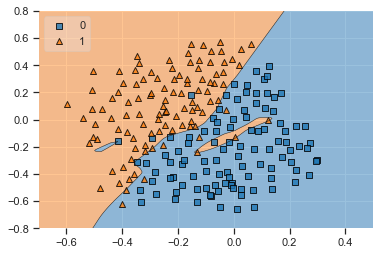

In [7]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7, 0.5)
plt.ylim(-0.8,0.8)
plt.show()

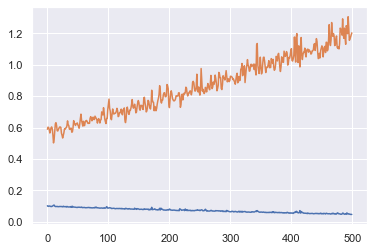

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Build another model with Dropout

In [9]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=2, activation = 'relu'))
model_1.add(Dense(128, activation = 'relu'))

model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation = 'sigmoid'))

model_1.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model_1.fit(X, y, epochs = 500, validation_split=0.2, verbose=1)

Epoch 1/500
6/6 [==============================] - 0s 26ms/step - loss: 0.6789 - accuracy: 0.6726 - val_loss: 0.6736 - val_accuracy: 0.6047
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6330 - accuracy: 0.8393 - val_loss: 0.6555 - val_accuracy: 0.6047
Epoch 3/500
6/6 [==============================] - 0s 6ms/step - loss: 0.5815 - accuracy: 0.8571 - val_loss: 0.6375 - val_accuracy: 0.6047
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 0.5444 - accuracy: 0.8631 - val_loss: 0.6175 - val_accuracy: 0.6047
Epoch 5/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4876 - accuracy: 0.8750 - val_loss: 0.5999 - val_accuracy: 0.6279
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4376 - accuracy: 0.8750 - val_loss: 0.5850 - val_accuracy: 0.6512
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 0.3842 - accuracy: 0.8869 - val_loss: 0.5746 - val_accuracy: 0.6744
Epoch 8/500
6/6 [=========

6/6 [==============================] - 0s 5ms/step - loss: 0.2013 - accuracy: 0.9524 - val_loss: 0.3434 - val_accuracy: 0.8605
Epoch 60/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2015 - accuracy: 0.9524 - val_loss: 0.3654 - val_accuracy: 0.8605
Epoch 61/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2040 - accuracy: 0.9286 - val_loss: 0.3941 - val_accuracy: 0.8605
Epoch 62/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2010 - accuracy: 0.9226 - val_loss: 0.4013 - val_accuracy: 0.8605
Epoch 63/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2003 - accuracy: 0.9286 - val_loss: 0.3914 - val_accuracy: 0.8605
Epoch 64/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1848 - accuracy: 0.9345 - val_loss: 0.3787 - val_accuracy: 0.8605
Epoch 65/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1871 - accuracy: 0.9286 - val_loss: 0.3766 - val_accuracy: 0.8605
Epoch 66/500
6/6 [===============

6/6 [==============================] - 0s 5ms/step - loss: 0.1730 - accuracy: 0.9345 - val_loss: 0.4103 - val_accuracy: 0.8605
Epoch 118/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1811 - accuracy: 0.9464 - val_loss: 0.4065 - val_accuracy: 0.8605
Epoch 119/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1850 - accuracy: 0.9405 - val_loss: 0.4105 - val_accuracy: 0.8605
Epoch 120/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1772 - accuracy: 0.9405 - val_loss: 0.4089 - val_accuracy: 0.8605
Epoch 121/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1706 - accuracy: 0.9464 - val_loss: 0.4119 - val_accuracy: 0.8605
Epoch 122/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1789 - accuracy: 0.9286 - val_loss: 0.4169 - val_accuracy: 0.8605
Epoch 123/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1808 - accuracy: 0.9464 - val_loss: 0.4333 - val_accuracy: 0.8605
Epoch 124/500
6/6 [========

6/6 [==============================] - 0s 5ms/step - loss: 0.1738 - accuracy: 0.9405 - val_loss: 0.4051 - val_accuracy: 0.8605
Epoch 176/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1747 - accuracy: 0.9405 - val_loss: 0.4191 - val_accuracy: 0.8605
Epoch 177/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1572 - accuracy: 0.9464 - val_loss: 0.4288 - val_accuracy: 0.8605
Epoch 178/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1779 - accuracy: 0.9464 - val_loss: 0.4283 - val_accuracy: 0.8605
Epoch 179/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1736 - accuracy: 0.9345 - val_loss: 0.4337 - val_accuracy: 0.8605
Epoch 180/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1826 - accuracy: 0.9345 - val_loss: 0.4329 - val_accuracy: 0.8605
Epoch 181/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1770 - accuracy: 0.9345 - val_loss: 0.4321 - val_accuracy: 0.8605
Epoch 182/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1672 - accuracy: 0.9405 - val_loss: 0.4488 - val_accuracy: 0.8605
Epoch 234/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1565 - accuracy: 0.9405 - val_loss: 0.4481 - val_accuracy: 0.8605
Epoch 235/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1606 - accuracy: 0.9464 - val_loss: 0.4522 - val_accuracy: 0.8605
Epoch 236/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1585 - accuracy: 0.9345 - val_loss: 0.4594 - val_accuracy: 0.8605
Epoch 237/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1535 - accuracy: 0.9405 - val_loss: 0.4609 - val_accuracy: 0.8605
Epoch 238/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1577 - accuracy: 0.9345 - val_loss: 0.4487 - val_accuracy: 0.8605
Epoch 239/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1558 - accuracy: 0.9524 - val_loss: 0.4388 - val_accuracy: 0.8605
Epoch 240/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1389 - accuracy: 0.9583 - val_loss: 0.4361 - val_accuracy: 0.8605
Epoch 292/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1435 - accuracy: 0.9524 - val_loss: 0.4319 - val_accuracy: 0.8605
Epoch 293/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1400 - accuracy: 0.9405 - val_loss: 0.4373 - val_accuracy: 0.8605
Epoch 294/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1514 - accuracy: 0.9464 - val_loss: 0.4417 - val_accuracy: 0.8605
Epoch 295/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1417 - accuracy: 0.9583 - val_loss: 0.4570 - val_accuracy: 0.8372
Epoch 296/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1460 - accuracy: 0.9524 - val_loss: 0.4775 - val_accuracy: 0.8372
Epoch 297/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1403 - accuracy: 0.9524 - val_loss: 0.4817 - val_accuracy: 0.8372
Epoch 298/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1484 - accuracy: 0.9286 - val_loss: 0.4550 - val_accuracy: 0.8372
Epoch 350/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1299 - accuracy: 0.9583 - val_loss: 0.4326 - val_accuracy: 0.8837
Epoch 351/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1434 - accuracy: 0.9405 - val_loss: 0.4430 - val_accuracy: 0.8837
Epoch 352/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1395 - accuracy: 0.9524 - val_loss: 0.4943 - val_accuracy: 0.8372
Epoch 353/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1377 - accuracy: 0.9524 - val_loss: 0.5255 - val_accuracy: 0.8372
Epoch 354/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1373 - accuracy: 0.9464 - val_loss: 0.5014 - val_accuracy: 0.8372
Epoch 355/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1457 - accuracy: 0.9524 - val_loss: 0.4882 - val_accuracy: 0.8372
Epoch 356/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1243 - accuracy: 0.9643 - val_loss: 0.5496 - val_accuracy: 0.8372
Epoch 408/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1326 - accuracy: 0.9583 - val_loss: 0.5523 - val_accuracy: 0.8372
Epoch 409/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1287 - accuracy: 0.9464 - val_loss: 0.5634 - val_accuracy: 0.8372
Epoch 410/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1228 - accuracy: 0.9464 - val_loss: 0.5574 - val_accuracy: 0.8372
Epoch 411/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1268 - accuracy: 0.9524 - val_loss: 0.5582 - val_accuracy: 0.8372
Epoch 412/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1324 - accuracy: 0.9464 - val_loss: 0.5467 - val_accuracy: 0.8372
Epoch 413/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1233 - accuracy: 0.9524 - val_loss: 0.5569 - val_accuracy: 0.8372
Epoch 414/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1233 - accuracy: 0.9524 - val_loss: 0.5430 - val_accuracy: 0.8605
Epoch 466/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1168 - accuracy: 0.9583 - val_loss: 0.5483 - val_accuracy: 0.8605
Epoch 467/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1243 - accuracy: 0.9583 - val_loss: 0.5556 - val_accuracy: 0.8605
Epoch 468/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1080 - accuracy: 0.9643 - val_loss: 0.6086 - val_accuracy: 0.8372
Epoch 469/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1188 - accuracy: 0.9583 - val_loss: 0.6009 - val_accuracy: 0.8372
Epoch 470/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1233 - accuracy: 0.9464 - val_loss: 0.6018 - val_accuracy: 0.8372
Epoch 471/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1225 - accuracy: 0.9524 - val_loss: 0.5930 - val_accuracy: 0.8372
Epoch 472/500
6/6 [========

3888/3888 [==============================] - 2s 605us/step


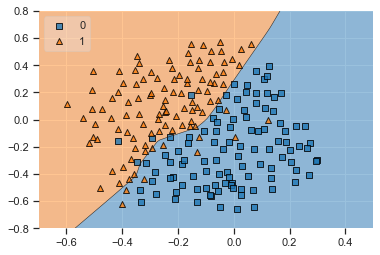

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model_1, legend=2)
plt.xlim(-0.7, 0.5)
plt.ylim(-0.8,0.8)
plt.show()

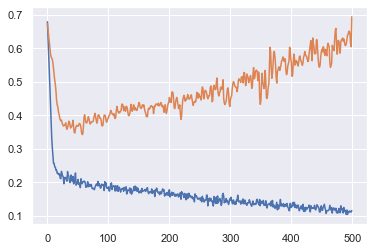

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

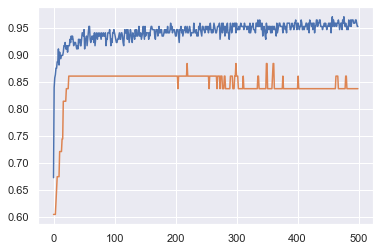

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Build another model with Dropout and Early Stopping

In [13]:
callback = EarlyStopping(monitor='val_loss',
    min_delta=0.00001,
    patience=100,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False)

In [14]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=2, activation = 'relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation = 'relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation = 'relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation = 'relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation = 'sigmoid'))

model_2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model_2.fit(X, y, epochs = 3000, validation_split=0.2, callbacks = callback)

Epoch 1/3000
6/6 [==============================] - 1s 32ms/step - loss: 0.6817 - accuracy: 0.7440 - val_loss: 0.6723 - val_accuracy: 0.5814
Epoch 2/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.6328 - accuracy: 0.8571 - val_loss: 0.6467 - val_accuracy: 0.5814
Epoch 3/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.5407 - accuracy: 0.8690 - val_loss: 0.6329 - val_accuracy: 0.5814
Epoch 4/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.4276 - accuracy: 0.8690 - val_loss: 0.6787 - val_accuracy: 0.5814
Epoch 5/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.3270 - accuracy: 0.8810 - val_loss: 0.7717 - val_accuracy: 0.6047
Epoch 6/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2674 - accuracy: 0.8929 - val_loss: 0.6811 - val_accuracy: 0.7209
Epoch 7/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2763 - accuracy: 0.8929 - val_loss: 0.4953 - val_accuracy: 0.7442
Epoch 8/3000
6/6 [=

6/6 [==============================] - 0s 6ms/step - loss: 0.1717 - accuracy: 0.9405 - val_loss: 0.4359 - val_accuracy: 0.8605
Epoch 60/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1597 - accuracy: 0.9524 - val_loss: 0.4251 - val_accuracy: 0.8605
Epoch 61/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1751 - accuracy: 0.9286 - val_loss: 0.4425 - val_accuracy: 0.8605
Epoch 62/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1648 - accuracy: 0.9405 - val_loss: 0.4497 - val_accuracy: 0.8605
Epoch 63/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1637 - accuracy: 0.9464 - val_loss: 0.4576 - val_accuracy: 0.8605
Epoch 64/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1620 - accuracy: 0.9524 - val_loss: 0.4360 - val_accuracy: 0.8605
Epoch 65/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1522 - accuracy: 0.9524 - val_loss: 0.4184 - val_accuracy: 0.8605
Epoch 66/3000
6/6 [========

6/6 [==============================] - 0s 7ms/step - loss: 0.1249 - accuracy: 0.9464 - val_loss: 0.4609 - val_accuracy: 0.8605
Epoch 118/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1450 - accuracy: 0.9524 - val_loss: 0.4581 - val_accuracy: 0.8605
Epoch 119/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1268 - accuracy: 0.9524 - val_loss: 0.4510 - val_accuracy: 0.8605
Epoch 120/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1361 - accuracy: 0.9583 - val_loss: 0.4735 - val_accuracy: 0.8605
Epoch 121/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1265 - accuracy: 0.9524 - val_loss: 0.4797 - val_accuracy: 0.8605
Epoch 122/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1163 - accuracy: 0.9583 - val_loss: 0.4643 - val_accuracy: 0.8605
Epoch 123/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.1133 - accuracy: 0.9583 - val_loss: 0.4823 - val_accuracy: 0.8605
Epoch 124/3000
6/6 [=

3888/3888 [==============================] - 3s 651us/step


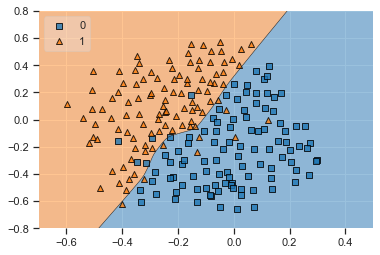

In [15]:
plot_decision_regions(X, y.astype('int'), clf=model_2, legend=2)
plt.xlim(-0.7, 0.5)
plt.ylim(-0.8,0.8)
plt.show()

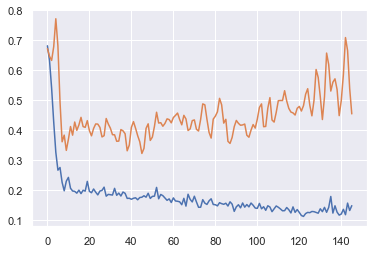

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

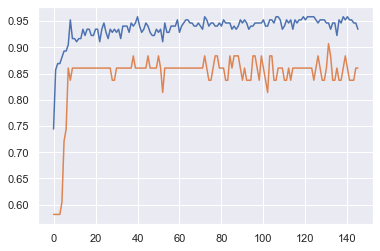

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Hence a combination of Dropout and Early Stopping increases model accuracy